In [1]:
import os
from os.path import exists
from tifffile import imread
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib import cm
import numpy as np
import pandas as pd
from rich.progress import track

pd.options.mode.chained_assignment = None  # default='warn'

In [41]:
um_per_pixel = 0.117
s_per_frame = 2
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig3_coralled by nano domains/FUS488_FL_PAINT/example_tracks-timelapsePAINT/FOV4-46"
os.chdir(folder_save)

# load dataset
fname_csv = "20230928-FOV-4-condensateID-46-left-timelapsePAINT_reformatted.csv"
fname_tif = "20230928-FOV-4-condensateID-46-left-timelapsePAINT.tif"

df = pd.read_csv(fname_csv)
video = imread(fname_tif)

# color
cmap_color_end = "#00274c"
cmap_color_start = "#ffcb05"
cmap_name = "maize2blue"
cmap_track = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=200,
)

cmap_color_end = "#00FFFF"
cmap_color_start = "black"
cmap_name = "dark2cyan"
cmap_img = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=200,
)


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


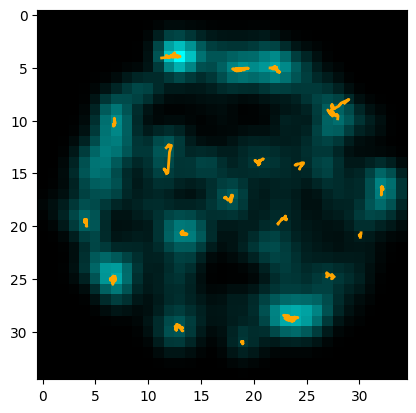

In [71]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(video[0], cmap=cmap_img)
tracks = df
tracks = tracks.astype(float)
for trackID in tracks["trackID"].unique():
    track = tracks[tracks["trackID"] == trackID]
    track = track.sort_values(["t"])
    plt.plot(
        track.x,
        track.y,
        color="orange",
        lw=2,
    )
plt.savefig(
    "ref.png",
    format="png",
    dpi=300,
    bbox_inches="tight",
)

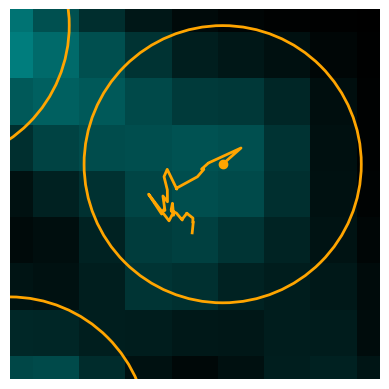

In [93]:
center_x = 28
center_y = 9
pad = 4

for frame in [0, 16, 32, 48]:
    plt.close()
    fig, ax = plt.subplots(1, 1)
    im = ax.imshow(video[frame], cmap=cmap_img)

    for x, y in zip(df[df.t == frame].x, df[df.t == frame].y):
        c = plt.Circle((x, y), 3, color="orange", fill=False, lw=2)
        ax.add_patch(c)
        ax.scatter(x, y, color="orange")

    tracks = df[df.t <= frame]
    tracks = tracks.astype(float)
    for trackID in tracks["trackID"].unique():
        track = tracks[tracks["trackID"] == trackID]
        track = track.sort_values(["t"])
        plt.plot(
            track.x,
            track.y,
            color="orange",
            lw=2,
        )

    plt.xlim(center_x - pad, center_x + pad)
    plt.ylim(center_y - pad, center_y + pad)

    plt.axis("off")
    ax.invert_yaxis()
    plt.savefig(
        "x-" + str(center_x) + "-y-" + str(center_y) + "-frame-" + str(frame) + ".png",
        format="png",
        dpi=300,
        bbox_inches="tight",
    )